<a href="https://colab.research.google.com/github/Alice1304/section_project/blob/main/AI_14_%EC%B2%9C%EC%84%B8%ED%9D%AC_Section1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **EDA & DATA WRANGLING**

**1> 데이터셋 불러오기**

In [126]:
import pandas as pd
import numpy as np
from google.colab import files
uploaded = files.upload()

Saving vgames2.csv to vgames2 (1).csv


In [127]:
df = pd.read_csv('vgames2.csv')

In [128]:
#데이터가 잘 불려왔는지를 확인합니다

In [129]:
df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [130]:
#인덱스 칼럼 제거하기

In [131]:
del df['Unnamed: 0']

In [132]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


**2> 데이터셋의 성질파악하기**

In [133]:
print(df.shape)

(16598, 9)


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [135]:
#sales의 데이터 타입이 float이 아닌 object인 것을 보니 데이터가 전부 숫자만으로 이루어지진 않았을 것 같음.

In [136]:
df.duplicated().sum()

1

In [137]:
df = df.drop_duplicates()

In [138]:
print(df.shape)

(16597, 9)


In [139]:
df = df.reset_index(drop=True)

In [140]:
df.dropna()
df = df.dropna()

In [141]:
print(df.shape)

(16241, 9)


In [142]:
#k와 m으로 되어있는 sales 데이터들을 숫자로 모두 변경


In [143]:
sale = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
for i in sale : 
  df[i] = df[i].replace({"K":"*0.001", "M":"*1"}, regex=True).map(pd.eval)

In [144]:
df_1 = df

In [145]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 0 to 16596
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  float64
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  float64
 6   EU_Sales     16241 non-null  float64
 7   JP_Sales     16241 non-null  float64
 8   Other_Sales  16241 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.2+ MB


In [146]:
df_1.loc[df_1['Year'] < 17,'Year'] = 2000+df_1['Year']
df_1.loc[(df_1['Year'] > 17) & (df_1['Year'] < 100),'Year'] = 1900+df_1['Year']
df_1.sort_values('Year', ascending=True)
# 97,99. 00 등의 값으로 나오던 year 값들이 알맞게 들어간 것을 확인 할 수 있음 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
14263,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0.00,0.01
5723,Asteroids,2600,1980.0,Shooter,Atari,4.00,0.26,0.00,0.05
15011,Missile Command,2600,1980.0,Shooter,Atari,2.56,0.17,0.00,0.03
9225,Bridge,2600,1980.0,Misc,Activision,0.25,0.02,0.00,0.00
13132,Freeway,2600,1980.0,Action,Activision,0.32,0.02,0.00,0.00
...,...,...,...,...,...,...,...,...,...
7129,Jikkyou Powerful Pro Baseball 2016,PS3,2016.0,Sports,Konami Digital Entertainment,0.00,0.00,0.11,0.00
10106,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.00,0.00,0.03,0.00
5310,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.00,0.00,0.01,0.00
15232,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.00,0.00,0.01,0.00


### **Q1. 지역에 따라 선호하는 게임 장르가 다를까?**

In [147]:
df_g = df_1.groupby('Genre').sum()
df_g

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,,
Action,6505617.0,858.75,513.64,156.60,183.99
Adventure,2546304.0,101.79,63.66,51.87,16.70
Fighting,1673860.0,220.35,99.90,87.14,36.15
Misc,3374273.0,394.73,208.15,104.18,72.64
Platform,1749321.0,445.38,200.63,130.53,51.45
Puzzle,1134959.0,121.58,50.47,56.24,12.44
Racing,2443902.0,354.70,235.02,56.32,76.51
Role-Playing,2940339.0,318.76,183.09,342.93,56.73
Shooter,2567579.0,574.48,310.23,38.18,101.86


In [148]:
df_g_NA= df_g[['NA_Sales']].reset_index(drop= False)

In [149]:
df_g_NA

,Genre,NA_Sales
0,Action,858.75
1,Adventure,101.79
2,Fighting,220.35
3,Misc,394.73
4,Platform,445.38
5,Puzzle,121.58
6,Racing,354.70
7,Role-Playing,318.76
8,Shooter,574.48
9,Simulation,181.43


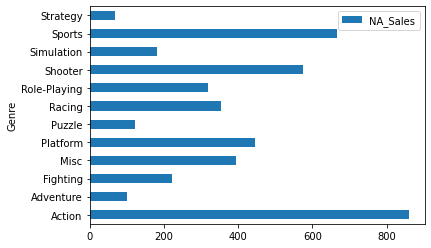

In [150]:
df_g_NA.plot.barh(x='Genre', y='NA_Sales')

In [151]:
#북아메리카에서는 액션의 출고량이 가장많았다. 

In [152]:
df_g_EU= df_g[['EU_Sales']].reset_index(drop= False)
df_g_EU

,Genre,EU_Sales
0,Action,513.64
1,Adventure,63.66
2,Fighting,99.90
3,Misc,208.15
4,Platform,200.63
5,Puzzle,50.47
6,Racing,235.02
7,Role-Playing,183.09
8,Shooter,310.23
9,Simulation,112.99


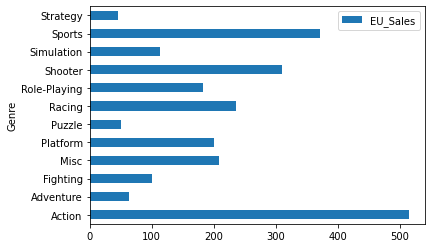

In [153]:
df_g_EU.plot.barh(x='Genre', y='EU_Sales')

In [154]:
colors = ['red','blue']

In [155]:
#유럽지역에서도 액션의 인기가 가장 높았다 

In [156]:
df_g_JP= df_g[['JP_Sales']].reset_index(drop= False)

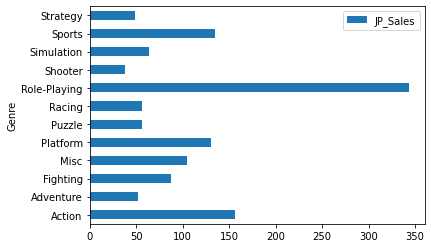

In [157]:
df_g_JP.plot.barh(x='Genre', y='JP_Sales')

In [158]:
df_g_OT= df_g[['Other_Sales']].reset_index(drop= False)

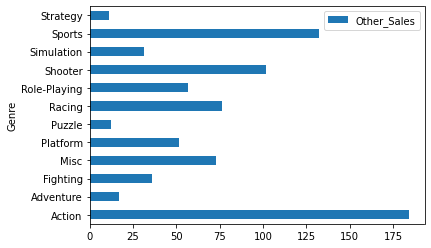

In [159]:
df_g_OT.plot.barh(x='Genre', y='Other_Sales')

In [160]:
#북미,유럽,일본을 제외한 지역에서도 액션장르가 가장 인기가 많은 것으로 나옴 

### **Q2. 연도별 게임의 트렌드가 있을까?**

In [161]:
df_s= df_1.groupby('Year').sum() 
df_s.head() #df_s는 년도별 판매량 

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Year,,,,
1980.0,10.13,0.64,0.00,0.11
1981.0,33.40,1.96,0.00,0.32
1982.0,26.92,1.65,0.00,0.31
1983.0,7.76,0.80,8.10,0.14
1984.0,33.28,2.10,14.27,0.70


In [162]:
#지역별 / 연도별 판매량을 살펴보자

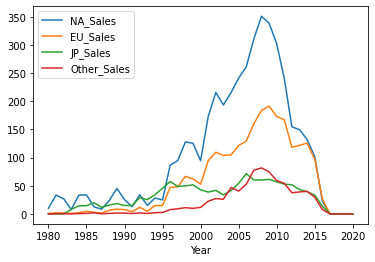

In [163]:
df_s.plot()

In [164]:
df_2015 = df_1[df_1['Year']>2015] 
print(df_2015.shape)
#2015년도 이후 세일즈 데이터 부족 


(346, 9)


In [165]:
df_yg= df_1.groupby(['Genre','Year'], as_index=False).sum()
df_yg 

,Genre,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,1980.0,0.32,0.02,0.00,0.00
1,Action,1981.0,13.86,0.81,0.00,0.12
2,Action,1982.0,6.07,0.38,0.00,0.05
3,Action,1983.0,2.67,0.17,0.00,0.02
4,Action,1984.0,0.80,0.19,0.83,0.03
...,...,...,...,...,...,...
383,Strategy,2012.0,0.94,0.99,1.11,0.29
384,Strategy,2013.0,2.39,2.47,0.82,0.64
385,Strategy,2014.0,0.16,0.22,0.55,0.04
386,Strategy,2015.0,0.57,0.98,0.15,0.12


In [166]:
df_yg['total'] = df_yg[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum(axis=1)
#지역별 판매량을 합친 'total'컬럼 생성

In [167]:
df_yg.head()

,Genre,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total
0,Action,1980.0,0.32,0.02,0.00,0.00,0.34
1,Action,1981.0,13.86,0.81,0.00,0.12,14.79
2,Action,1982.0,6.07,0.38,0.00,0.05,6.50
3,Action,1983.0,2.67,0.17,0.00,0.02,2.86
4,Action,1984.0,0.80,0.19,0.83,0.03,1.85


In [168]:
import seaborn as sns
import matplotlib.pyplot as plt

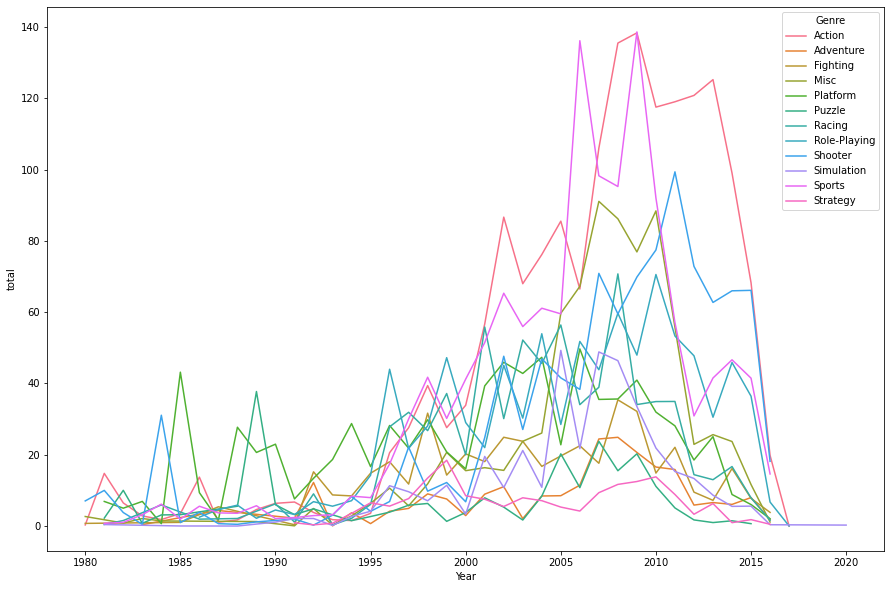

In [169]:
plt.figure(figsize=(15,10))
sns.lineplot(x='Year', y='total', hue='Genre', data=df_yg)

In [170]:
#다양한 장르가 섞여있어 상위 6개 장르만 시각화 

In [171]:
gt = df_yg.groupby(['Genre'],as_index=False)['total'].sum()
gt
#장르별로 총 판매량 뽑아내기

,Genre,total
0,Action,1712.98
1,Adventure,234.02
2,Fighting,443.54
3,Misc,779.70
4,Platform,827.99
5,Puzzle,240.73
6,Racing,722.55
7,Role-Playing,901.51
8,Shooter,1024.75
9,Simulation,389.28


In [172]:
gt.sort_values('total', ascending=False)
#판매순정렬

,Genre,total
0,Action,1712.98
10,Sports,1305.34
8,Shooter,1024.75
7,Role-Playing,901.51
4,Platform,827.99
3,Misc,779.70
6,Racing,722.55
2,Fighting,443.54
9,Simulation,389.28
5,Puzzle,240.73


In [173]:
#12개의 장르중 하위 6개 삭제 

In [174]:
gt_drop = df_yg[(df_yg['Genre']== 'Strategy')|(df_yg['Genre']== 'Adventure') |(df_yg['Genre']== 'Puzzle')|(df_yg['Genre']== 'Simulation')|(df_yg['Genre']== 'Fighting')|(df_yg['Genre']== 'Racing')].index

In [175]:
gt_drop

Int64Index([ 38,  39,  40,  41,  42,  43,  44,  45,  46,  47,
            ...
            378, 379, 380, 381, 382, 383, 384, 385, 386, 387],
           dtype='int64', length=179)

In [176]:
df_yg_gt = df_yg.drop(gt_drop)
df_yg_gt

,Genre,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total
0,Action,1980.0,0.32,0.02,0.00,0.00,0.34
1,Action,1981.0,13.86,0.81,0.00,0.12,14.79
2,Action,1982.0,6.07,0.38,0.00,0.05,6.50
3,Action,1983.0,2.67,0.17,0.00,0.02,2.86
4,Action,1984.0,0.80,0.19,0.83,0.03,1.85
...,...,...,...,...,...,...,...
357,Sports,2012.0,16.40,8.83,2.59,3.08,30.90
358,Sports,2013.0,19.18,15.16,2.15,5.05,41.54
359,Sports,2014.0,19.82,18.70,1.60,6.52,46.64
360,Sports,2015.0,18.46,16.69,0.72,5.62,41.49


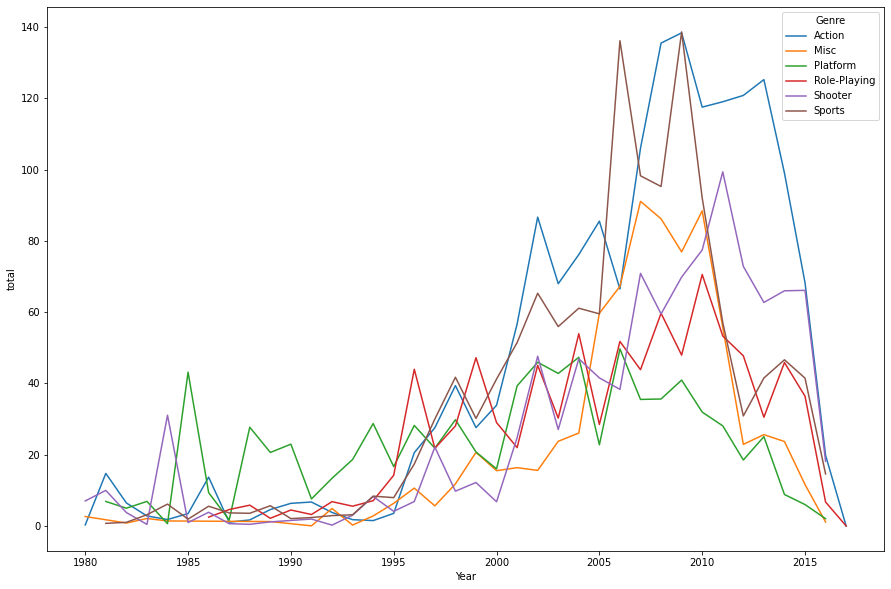

In [177]:
plt.figure(figsize=(15,10))
sns.lineplot(x='Year', y='total', hue='Genre', data=df_yg_gt)

In [178]:
#1. 1980년대 초반에는 'Shooter', 장르가 트랜드
#2. 1985년~1995년 'platform' 장르가 트랜드
#3. 1995년~ 중후반까지 'Role-Playing' 장르가 트랜드
#4. 2000년대 이후 'Action' 'Sports' 장르가 트랜드
#5. 2010년 이후로는 'Sports' 장르의 인기가 줄어들고, 'Action'과 'Shooter' 장르가 인기를 끌고 있다. 

In [179]:
#이제 플랫폼별 데이터 차이가 있는지 알아보자 

In [180]:
df_yp= df_1.groupby(['Platform','Year'], as_index=False).sum()
df_yp 

,Platform,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,2600,1980.0,10.13,0.64,0.00,0.11
1,2600,1981.0,33.40,1.96,0.00,0.32
2,2600,1982.0,26.92,1.65,0.00,0.31
3,2600,1983.0,5.44,0.34,0.00,0.06
4,2600,1984.0,0.26,0.01,0.00,0.00
...,...,...,...,...,...,...
236,XB,2008.0,0.13,0.04,0.00,0.01
237,XOne,2013.0,11.80,5.29,0.02,1.50
238,XOne,2014.0,30.41,17.75,0.14,4.14
239,XOne,2015.0,34.29,17.96,0.17,5.23


In [181]:
df_yp['total_2'] = df_yp[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum(axis=1)

In [182]:
df_yp.head()

,Platform,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_2
0,2600,1980.0,10.13,0.64,0.0,0.11,10.88
1,2600,1981.0,33.40,1.96,0.0,0.32,35.68
2,2600,1982.0,26.92,1.65,0.0,0.31,28.88
3,2600,1983.0,5.44,0.34,0.0,0.06,5.84
4,2600,1984.0,0.26,0.01,0.0,0.00,0.27


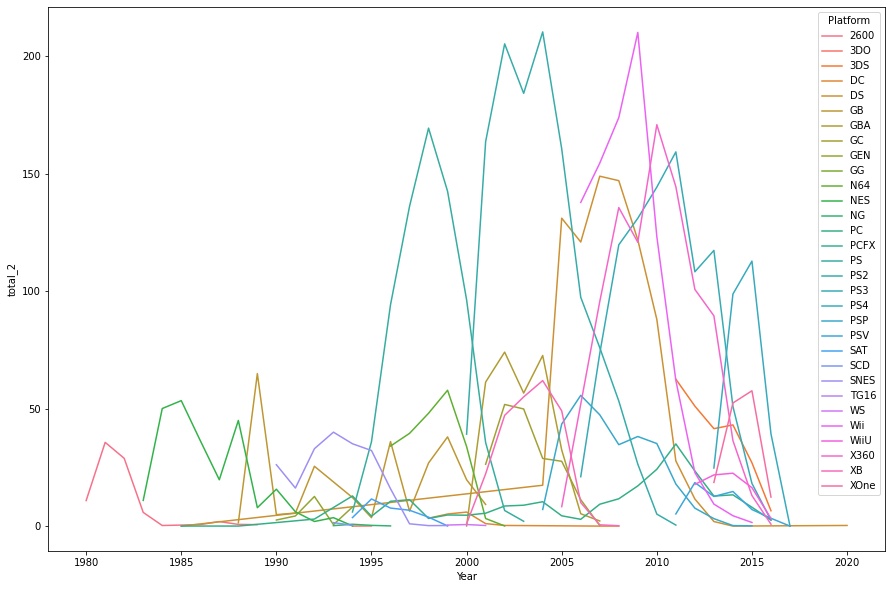

In [183]:
plt.figure(figsize=(15,10))
sns.lineplot(x='Year', y='total_2', hue='Platform', data=df_yp)

In [184]:
#이 또한, 상위플랫폼들을 기준으로 시각화 해준다 

In [185]:
pt = df_yp.groupby(['Platform'],as_index=False)['total_2'].sum()
pt

,Platform,total_2
0,2600,85.98
1,3DO,0.10
2,3DS,231.82
3,DC,15.95
4,DS,817.19
5,GB,254.43
6,GBA,304.76
7,GC,196.02
8,GEN,28.35
9,GG,0.04


In [186]:
pt.sort_values('total_2', ascending=False)

,Platform,total_2
16,PS2,1222.44
28,X360,968.59
17,PS3,946.74
26,Wii,900.15
4,DS,817.19
15,PS,725.16
6,GBA,304.76
19,PSP,290.84
18,PS4,275.78
5,GB,254.43


In [187]:
df_yp_pt=df_yp[(df_yp['Platform']== 'PS2')|(df_yp['Platform']== 'PS3') |(df_yp['Platform']== 'X360')|(df_yp['Platform']== 'Wii')|(df_yp['Platform']== 'DS')|(df_yp['Platform']== 'PS')|(df_yp['Platform']== 'PSP')|(df_yp['Platform']== 'GBA')]

In [188]:
df_yp_pt

,Platform,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_2
25,DS,1985.0,0.00,0.00,0.02,0.00,0.02
26,DS,2004.0,8.42,3.97,3.65,1.37,17.41
27,DS,2005.0,48.33,42.06,29.86,10.90,131.15
28,DS,2006.0,50.63,23.53,38.56,8.28,121.00
29,DS,2007.0,76.36,34.58,26.81,11.27,149.02
...,...,...,...,...,...,...,...
223,X360,2012.0,58.32,33.17,1.06,8.27,100.82
224,X360,2013.0,53.13,28.56,0.43,7.44,89.56
225,X360,2014.0,20.09,13.07,0.08,3.18,36.42
226,X360,2015.0,7.11,4.77,0.00,1.14,13.02


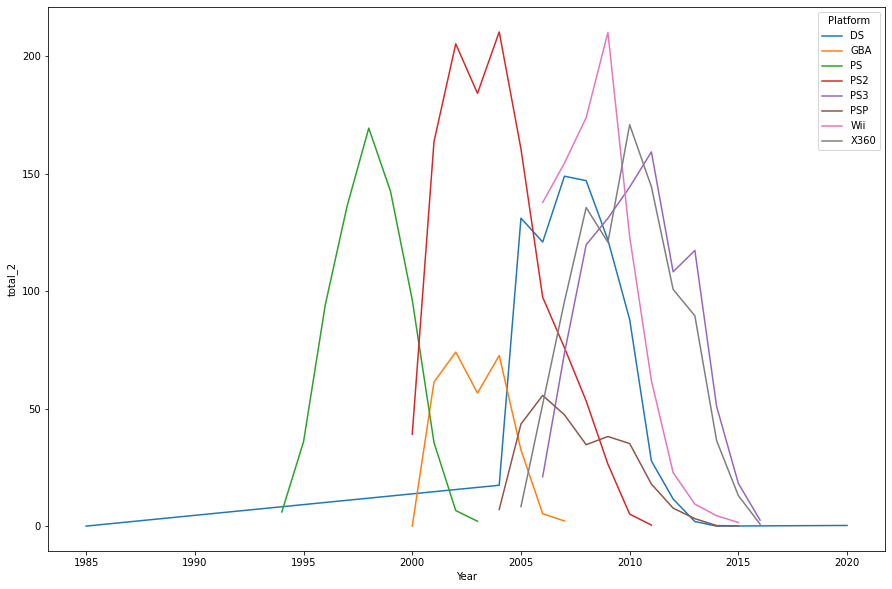

In [189]:
plt.figure(figsize=(15,10))
sns.lineplot(x='Year', y='total_2', hue='Platform', data=df_yp_pt)

In [190]:
#ps시리즈(ps,ps2,ps3)의 경우 새로운 version이 출시되면 그 이전 version의 사용량이 급 감소하는 추세 
#PS시리즈가 절대적인 강자이며
#시대별로 인기있는 게임플랫폼이 조금씩 다르다는 것을 알 수 있음 

In [191]:
#결론 : 연도별 플랫폼의 트랜드 차이가 유의미하게 나타난다 

### **Q2-1. 최근 게임 트랜드는?**

In [192]:
df_yg_rc = df_yg[df_yg['Year']>2009] 
df_yg_rc

,Genre,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total
30,Action,2010.0,60.32,35.75,8.58,12.85,117.50
31,Action,2011.0,53.73,41.04,10.82,13.41,119.00
32,Action,2012.0,52.13,42.26,12.25,14.14,120.78
33,Action,2013.0,53.79,45.21,10.88,15.33,125.21
34,Action,2014.0,38.73,40.48,6.50,13.30,99.01
...,...,...,...,...,...,...,...
383,Strategy,2012.0,0.94,0.99,1.11,0.29,3.33
384,Strategy,2013.0,2.39,2.47,0.82,0.64,6.32
385,Strategy,2014.0,0.16,0.22,0.55,0.04,0.97
386,Strategy,2015.0,0.57,0.98,0.15,0.12,1.82


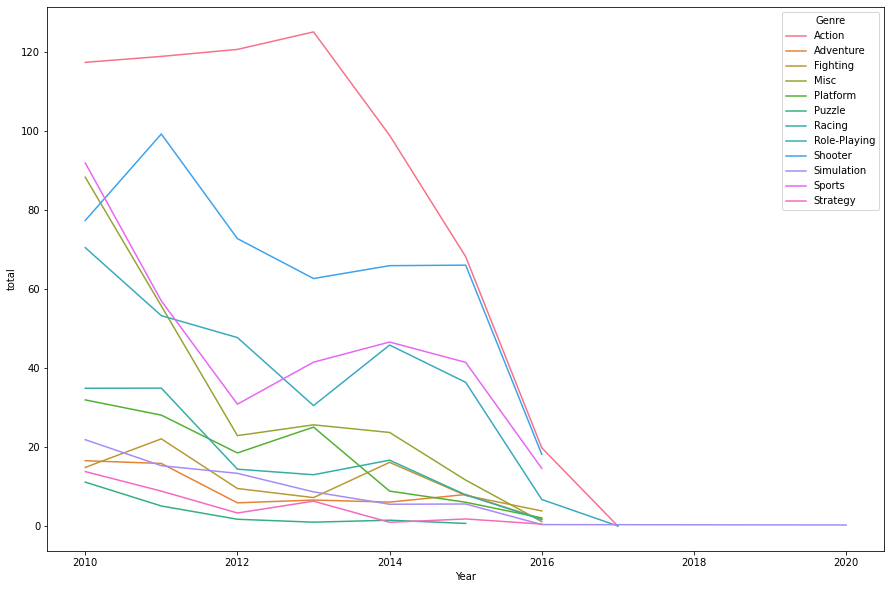

In [193]:
plt.figure(figsize=(15,10))
sns.lineplot(x='Year', y='total', hue='Genre', data=df_yg_rc)

In [194]:
#2010년도 이후 전세계적으로 가장 인기 있는 장르는 action, shooter 장르이며, roleplaying과 sport장르가 비슷하게 인기를 끌었다. 

In [195]:
df_yp_rc = df_yp[df_yp['Year']>2009] #df_yp_rc = 2009년 이후 자료 
df_yp_rc

,Platform,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_2
12,3DS,2011.0,26.98,18.42,12.80,4.38,62.58
13,3DS,2012.0,17.04,11.59,19.92,2.55,51.10
14,3DS,2013.0,10.16,10.29,19.18,1.88,41.51
15,3DS,2014.0,12.03,8.60,20.64,1.84,43.11
16,3DS,2015.0,5.82,4.77,15.39,0.99,26.97
...,...,...,...,...,...,...,...
227,X360,2016.0,0.36,0.40,0.00,0.07,0.83
237,XOne,2013.0,11.80,5.29,0.02,1.50,18.61
238,XOne,2014.0,30.41,17.75,0.14,4.14,52.44
239,XOne,2015.0,34.29,17.96,0.17,5.23,57.65


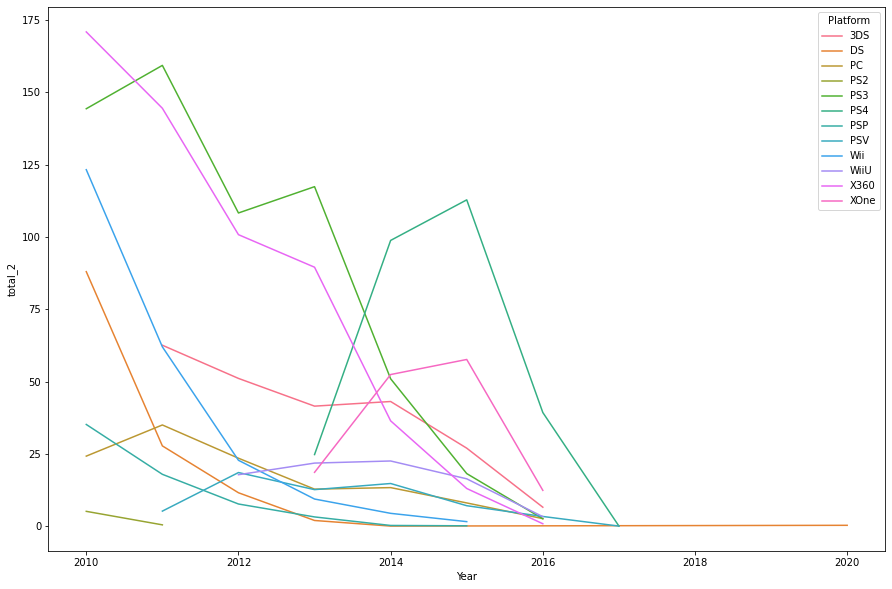

In [196]:
plt.figure(figsize=(15,10))
sns.lineplot(x='Year', y='total_2', hue='Platform', data=df_yp_rc)

In [197]:
#ps시리즈가 가장 인기가 많았으며, 그 뒤로, x360,xone이 최근의 트랜드 

### **Q3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스**

In [198]:
df_1['Total_Sales'] = df_1[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum(axis=1)
df_1

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16592,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16593,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16594,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16595,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


In [199]:
df_1.sort_values('Total_Sales', ascending=False)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
2908,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
4199,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
12578,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3352,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7829,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
...,...,...,...,...,...,...,...,...,...,...
10630,Cities: Skylines Snowfall,PC,2016.0,Simulation,Paradox Development,0.00,0.01,0.00,0.00,0.01
5002,Majesty 2 Collection,PC,2011.0,Strategy,Paradox Interactive,0.00,0.01,0.00,0.00,0.01
15859,Robopon 2: Cross Version,GBA,2001.0,Role-Playing,Hudson Entertainment,0.01,0.00,0.00,0.00,0.01
13766,Uchida Yasuou Mystery: Meitantei Senken Mitsuh...,DS,2009.0,Adventure,D3Publisher,0.00,0.00,0.01,0.00,0.01


In [200]:
#전세계적으로 인기 있었던 게임 10개 뽑아내기

In [201]:
df_1_asc = df_1.sort_values('Total_Sales', ascending=False).reset_index(drop=True) #df_1_asc = 총 판매량 순위

In [202]:
df_1_asc = df_1_asc.head(10)
df_1_asc

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


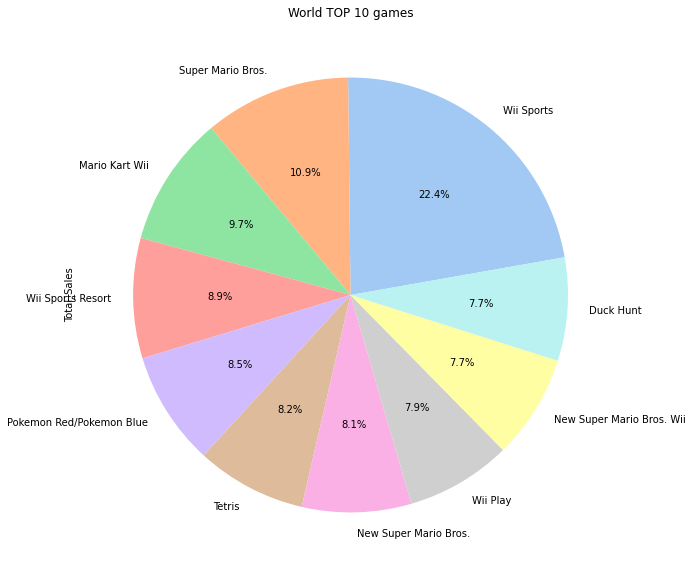

In [203]:
labels = df_1_asc['Name']
colors = sns.color_palette('pastel',len(labels))
df_1_asc['Total_Sales'].plot(kind='pie', title='World TOP 10 games', figsize=(30,10), autopct='%1.1f%%',startangle=10, labels=labels, colors = colors) #label 위치 바꾸기... 

In [204]:
#북미지역 기준 인기게임 알아보기 

In [205]:
df_1_asc_na = df_1.sort_values('NA_Sales', ascending=False)
df_1_asc_na

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
2908,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
4199,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
10487,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
1203,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
12578,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
...,...,...,...,...,...,...,...,...,...,...
8604,Card Fight!! Vanguard G: Stride to Victory!!,3DS,2016.0,Misc,FuRyu,0.00,0.00,0.04,0.00,0.04
8603,Minna no Conveni,DS,2010.0,Simulation,Taito,0.00,0.00,0.01,0.00,0.01
8602,MotoGP 15,X360,2015.0,Racing,Milestone S.r.l.,0.00,0.01,0.00,0.00,0.01
8601,Apassionata: Die Galanacht der Pferde,DS,2009.0,Simulation,RTL,0.00,0.04,0.00,0.01,0.05


In [206]:
df_1_asc_na = df_1_asc_na.reset_index()

In [207]:
df_1_asc_na.head(10)
df_1_asc_na = df_1_asc_na.head(10)

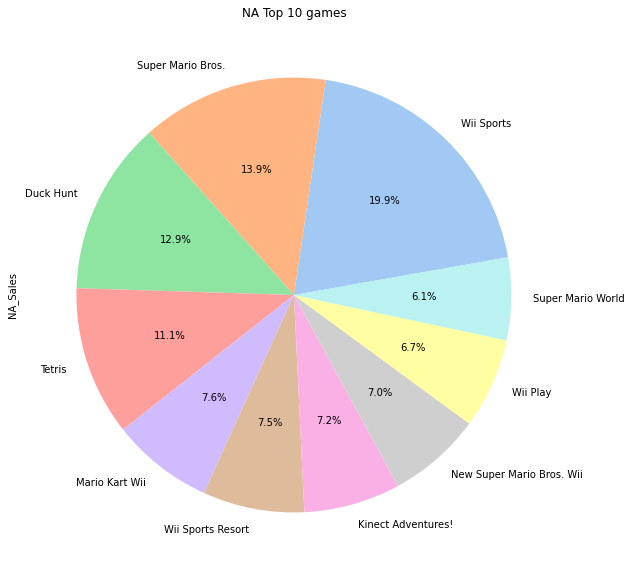

In [208]:
labels = df_1_asc_na['Name']
colors = sns.color_palette('pastel',len(labels))
df_1_asc_na['NA_Sales'].plot(kind='pie', title='NA Top 10 games', figsize=(30,10), autopct='%1.1f%%',startangle=10, labels=labels, colors = colors)

In [209]:
#유럽지역 기준 인기게임 알아보기 

In [210]:
df_1_asc_eu = df_1.sort_values('EU_Sales', ascending=False)
df_1_asc_eu

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
2908,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
12578,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3352,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
11136,Nintendogs,DS,2005.0,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.75
3483,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39
...,...,...,...,...,...,...,...,...,...,...
8194,UNO 52,DS,2006.0,Misc,Zoo Digital Publishing,0.01,0.00,0.00,0.00,0.01
8192,Period Cube: Torikago no Amadeus,PSV,2016.0,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01
8191,Super Robot Wars OG: The Moon Dwellers,PS3,2016.0,Misc,Namco Bandai Games,0.00,0.00,0.06,0.00,0.06
8190,XGRA: Extreme G Racing Association,XB,2003.0,Racing,Acclaim Entertainment,0.02,0.00,0.00,0.00,0.02


In [211]:
df_1_asc_eu = df_1_asc_eu.reset_index()

In [212]:
df_1_asc_eu.head(10)
df_1_asc_eu = df_1_asc_eu.head(10)

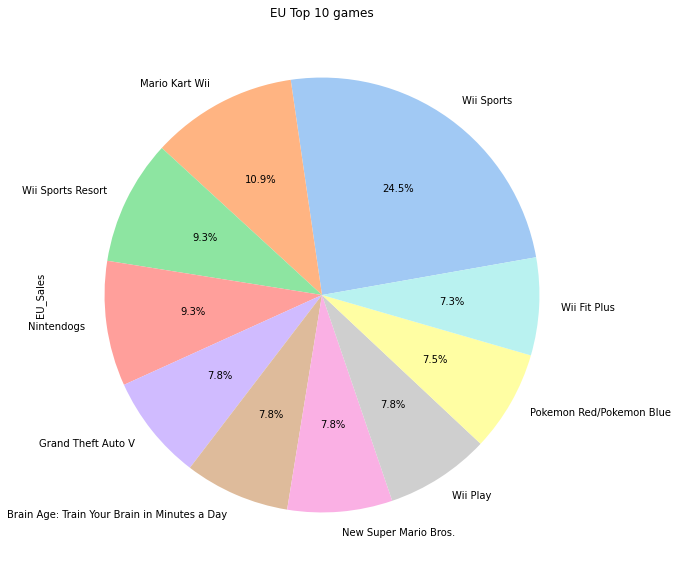

In [213]:
labels = df_1_asc_eu['Name']
colors = sns.color_palette('pastel',len(labels))
df_1_asc_eu['EU_Sales'].plot(kind='pie', title='EU Top 10 games', figsize=(30,10), autopct='%1.1f%%',startangle=10, labels=labels, colors = colors)

In [214]:
#일본지역 인기게임 알아보기

In [215]:
df_1_asc_jp = df_1.sort_values('JP_Sales', ascending=False)
df_1_asc_jp

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
7829,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
9415,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.09
4199,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
6937,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
10554,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.35
...,...,...,...,...,...,...,...,...,...,...
8174,Mushroom Men: Rise of the Fungi,DS,2008.0,Action,SouthPeak Games,0.10,0.00,0.00,0.01,0.11
8175,Downhill Domination,PS2,2003.0,Racing,Codemasters,0.23,0.18,0.00,0.06,0.47
1939,Burger Island,DS,2008.0,Action,Destineer,0.15,0.00,0.00,0.01,0.16
8177,Rabbids Party Collection,Wii,2010.0,Misc,Ubisoft,0.00,0.16,0.00,0.02,0.18


In [216]:
df_1_asc_jp = df_1_asc_jp.reset_index()

In [217]:
df_1_asc_jp.head(10)
df_1_asc_jp = df_1_asc_jp.head(10)

In [218]:
df_1_asc_jp

,index,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,7829,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
1,9415,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.09
2,4199,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,6937,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
4,10554,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.35
5,10620,Pokemon Black/Pokemon White,DS,2010.0,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,15.32
6,10916,Pokemon Ruby/Pokemon Sapphire,GBA,2002.0,Role-Playing,Nintendo,6.06,3.90,5.38,0.50,15.84
7,3273,Animal Crossing: Wild World,DS,2005.0,Simulation,Nintendo,2.55,3.52,5.33,0.88,12.28
8,511,Brain Age 2: More Training in Minutes a Day,DS,2005.0,Puzzle,Nintendo,3.44,5.36,5.32,1.18,15.30
9,1847,Monster Hunter Freedom 3,PSP,2010.0,Role-Playing,Capcom,0.00,0.00,4.87,0.00,4.87


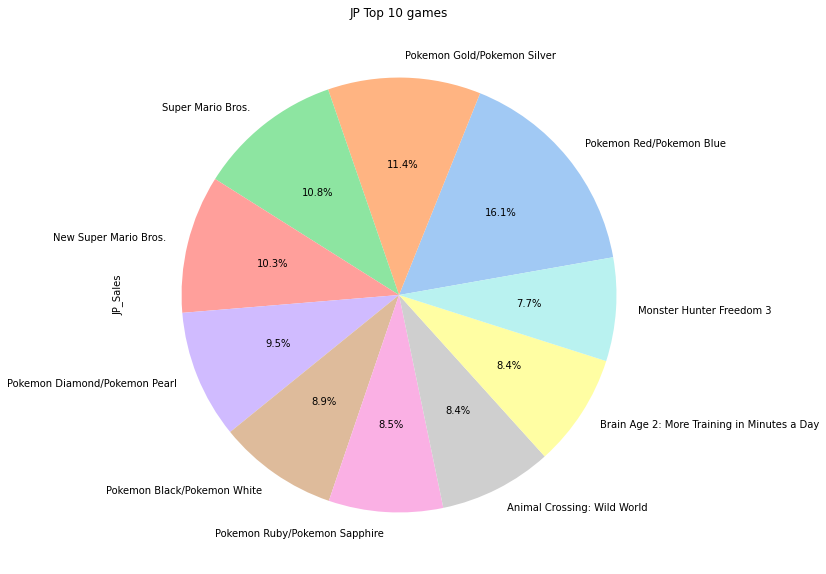

In [219]:
labels = df_1_asc_jp['Name']
colors = sns.color_palette('pastel',len(labels))
df_1_asc_jp['JP_Sales'].plot(kind='pie', title='JP Top 10 games', figsize=(30,10), autopct='%1.1f%%',startangle=10, labels=labels, colors = colors)

In [220]:
#그 외지역 인기 게임 알아보기

In [221]:
df_1_asc_ot = df_1.sort_values('Other_Sales', ascending=False)
df_1_asc_ot

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
14668,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
2908,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
14664,Gran Turismo 4,PS2,2004.0,Racing,Sony Computer Entertainment,3.01,0.01,1.10,7.53,11.65
3483,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39
12578,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
...,...,...,...,...,...,...,...,...,...,...
8018,Tail Concerto,PS,1998.0,Adventure,Namco Bandai Games,0.02,0.01,0.00,0.00,0.03
8014,Nayuta no Kiseki,PSP,2012.0,Action,Nihon Falcom Corporation,0.00,0.00,0.14,0.00,0.14
8012,Ceville,PC,2009.0,Action,Kalypso Media,0.00,0.02,0.00,0.00,0.02
8008,Planetarian: Chiisana Hoshi no Yume,PSP,2009.0,Adventure,Prototype,0.00,0.00,0.02,0.00,0.02


In [222]:
df_1_asc_ot = df_1_asc_ot.reset_index()

In [223]:
df_1_asc_ot.head(10)
df_1_asc_ot = df_1_asc_ot.head(10)

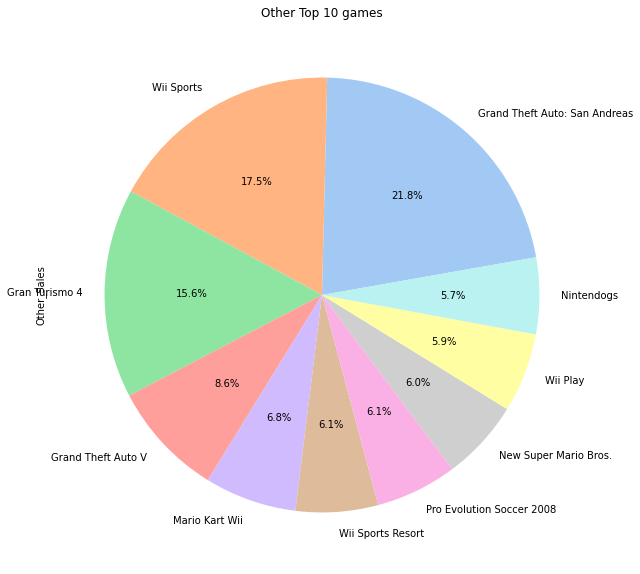

In [224]:
labels = df_1_asc_ot['Name']
colors = sns.color_palette('pastel',len(labels))
df_1_asc_ot['Other_Sales'].plot(kind='pie', title='Other Top 10 games', figsize=(30,10), autopct='%1.1f%%',startangle=10, labels=labels, colors = colors)

In [ ]:
#전세계 인기게임 TOP10의 장르는? 

In [225]:
#북미지역 인기게임 TOP 10의 장르는? 

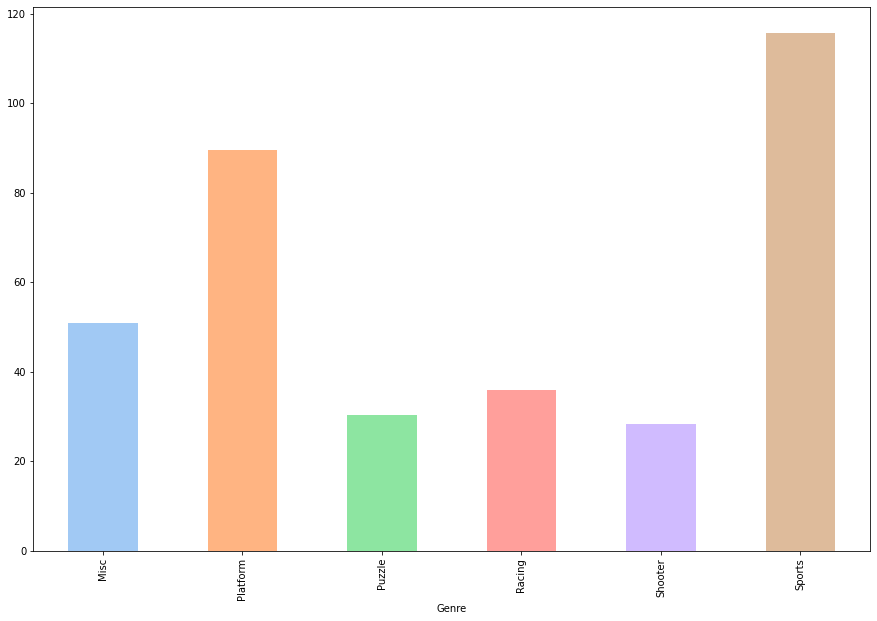

In [254]:
colors = sns.color_palette('pastel')
df_1_asc_na.groupby('Genre')['Total_Sales'].sum().plot(kind='bar', figsize=(15,10),width = 0.5, color=colors)

In [226]:
df_1_asc_na

,index,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,2908,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,4199,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,10487,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
3,1203,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
4,12578,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
5,3352,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
6,4343,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
7,16530,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61
8,3014,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
9,13110,Super Mario World,SNES,1990.0,Platform,Nintendo,12.78,3.75,3.54,0.55,20.62


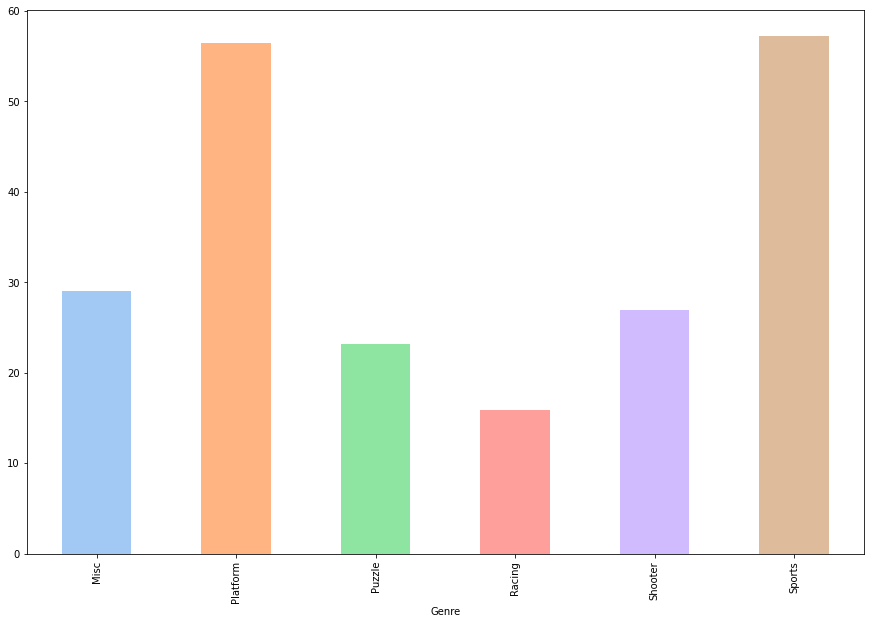

In [227]:
colors = sns.color_palette('pastel')
df_1_asc_na.groupby('Genre')['NA_Sales'].sum().plot(kind='bar', figsize=(15,10),width = 0.5, color=colors)

In [228]:
#EU지역 인기 TOP10 장르는?

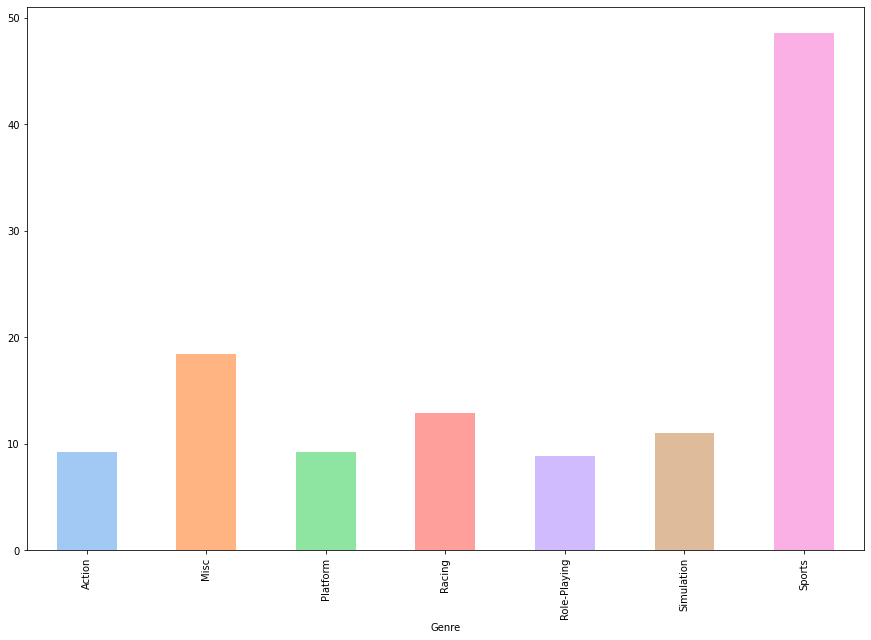

In [229]:
colors = sns.color_palette('pastel')
df_1_asc_eu.groupby('Genre')['EU_Sales'].sum().plot(kind='bar', figsize=(15,10),width = 0.5, color=colors)

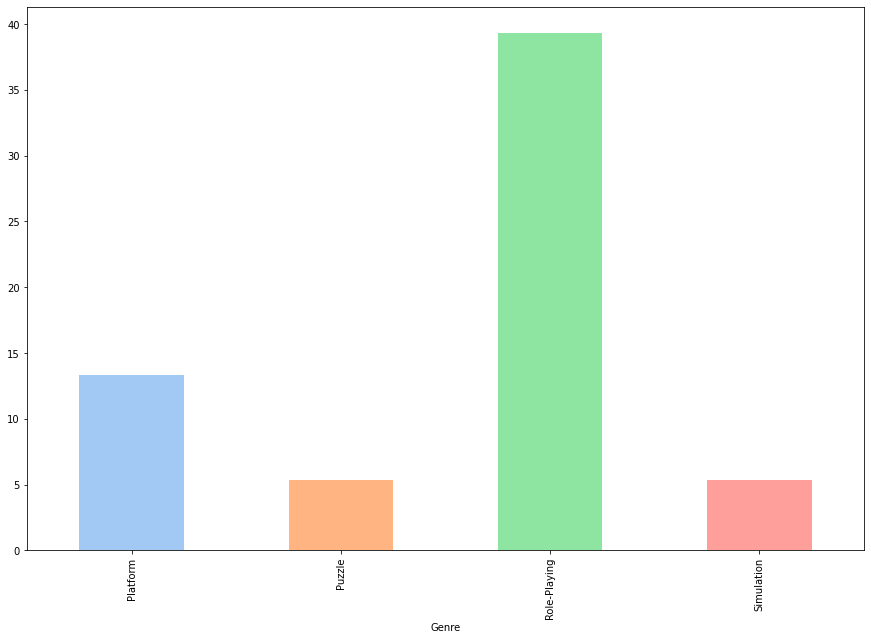

In [230]:
colors = sns.color_palette('pastel')
df_1_asc_jp.groupby('Genre')['JP_Sales'].sum().plot(kind='bar', figsize=(15,10),width = 0.5, color=colors)

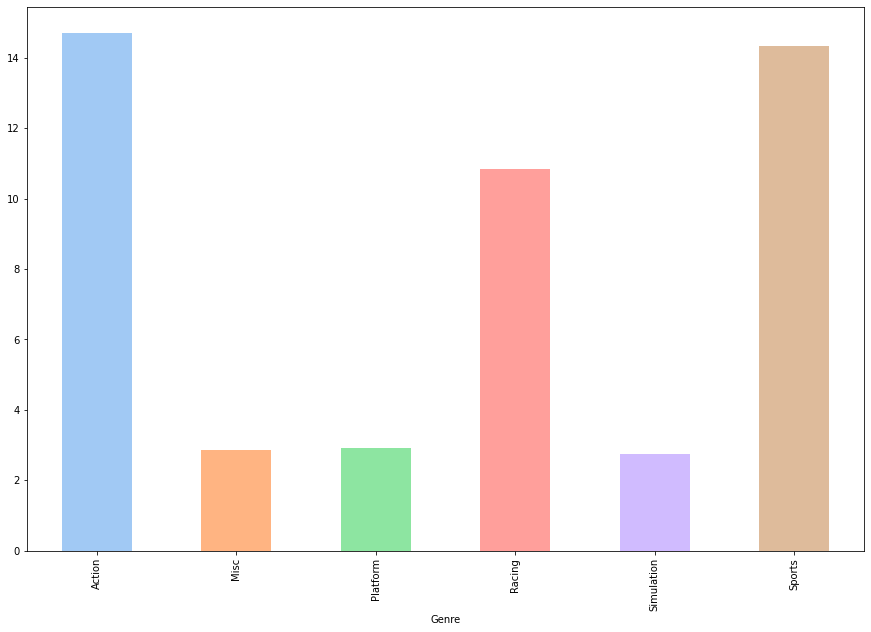

In [231]:
colors = sns.color_palette('pastel')
df_1_asc_ot.groupby('Genre')['Other_Sales'].sum().plot(kind='bar', figsize=(15,10),width = 0.5, color=colors)

# **Q4. 다음 분기에는 어떤 게임을 설계해야할까?**

In [232]:
#2010년 이후 인기 장르 

In [233]:
df_yg_rc_tt=df_yg_rc.groupby(['Genre'])['total'].sum()
df_yg_rc_tt

Genre
Action          669.60
Adventure        60.85
Fighting         81.53
Misc            229.30
Platform        120.73
Puzzle           21.18
Racing          123.64
Role-Playing    291.29
Shooter         462.64
Simulation       71.09
Sports          324.28
Strategy         35.65
Name: total, dtype: float64

In [234]:
#2010년 이후 NA지역 인기 장르

In [235]:
df_yg_rc_na=df_yg_rc.groupby(['Genre'])['NA_Sales'].sum()
df_yg_rc_na

Genre
Action          286.40
Adventure        20.64
Fighting         38.56
Misc            123.23
Platform         55.47
Puzzle            9.39
Racing           45.62
Role-Playing    102.40
Shooter         227.63
Simulation       26.69
Sports          154.03
Strategy         13.25
Name: NA_Sales, dtype: float64

In [236]:
#2010년 이후 EU지역 인기 장르 

In [237]:
df_yg_rc_eu=df_yg_rc.groupby(['Genre'])['EU_Sales'].sum()
df_yg_rc_eu

Genre
Action          234.99
Adventure        19.07
Fighting         20.77
Misc             64.42
Platform         38.67
Puzzle            6.77
Racing           55.51
Role-Playing     69.70
Shooter         166.44
Simulation       25.20
Sports          115.63
Strategy         12.30
Name: EU_Sales, dtype: float64

In [238]:
#2010년 이후 JP지역 인기 장르 

In [239]:
df_yg_rc_jp=df_yg_rc.groupby(['Genre'])['JP_Sales'].sum()
df_yg_rc_jp

Genre
Action          70.38
Adventure       15.30
Fighting        13.75
Misc            21.45
Platform        15.75
Puzzle           3.40
Racing           6.65
Role-Playing    96.10
Shooter         13.54
Simulation      13.20
Sports          15.34
Strategy         6.60
Name: JP_Sales, dtype: float64

In [240]:
#2010년 이후 OTHER 지역 인기 장르 

In [241]:
df_yg_rc_ot=df_yg_rc.groupby(['Genre'])['Other_Sales'].sum()
df_yg_rc_ot

Genre
Action          77.83
Adventure        5.84
Fighting         8.45
Misc            20.20
Platform        10.84
Puzzle           1.62
Racing          15.86
Role-Playing    23.09
Shooter         55.03
Simulation       6.00
Sports          39.28
Strategy         3.50
Name: Other_Sales, dtype: float64

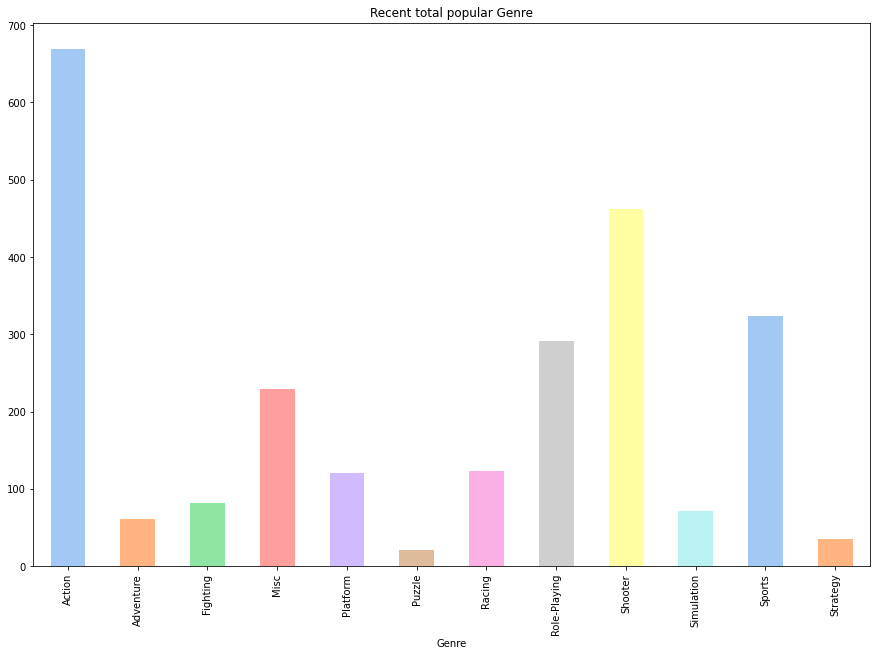

In [242]:
colors = sns.color_palette('pastel')
df_yg_rc_tt.plot(kind='bar', figsize=(15,10),width = 0.5, color=colors, title = 'Recent total popular Genre')

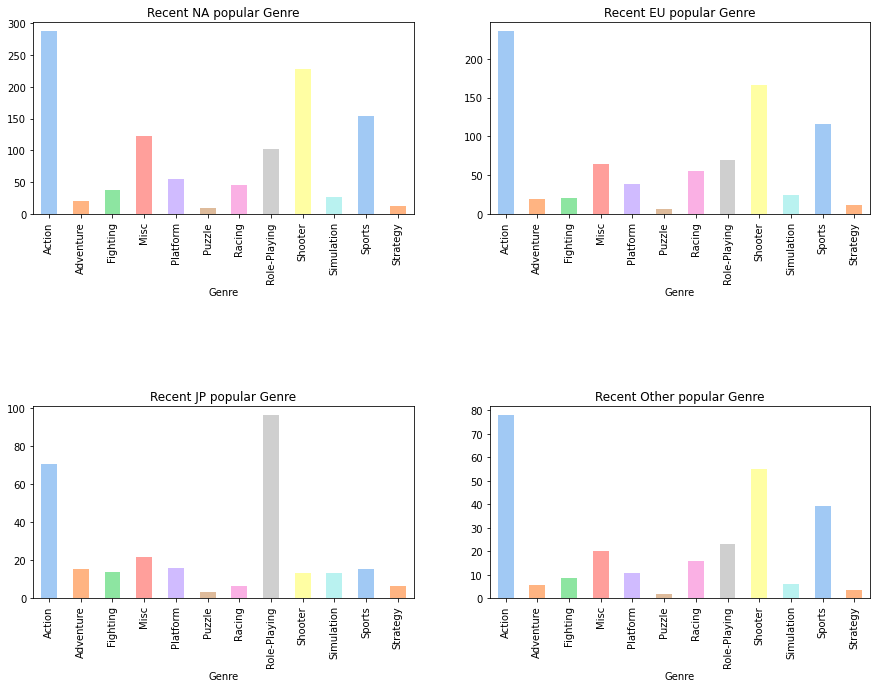

In [243]:
plt.subplot(2,2,1)
colors = sns.color_palette('pastel')
df_yg_rc_na.plot(kind='bar', figsize=(15,10),width = 0.5, color=colors, title = 'Recent NA popular Genre')

plt.subplot(2,2,2)
colors = sns.color_palette('pastel')
df_yg_rc_eu.plot(kind='bar', figsize=(15,10),width = 0.5, color=colors, title = 'Recent EU popular Genre')

plt.subplot(2,2,3)
colors = sns.color_palette('pastel')
df_yg_rc_jp.plot(kind='bar', figsize=(15,10),width = 0.5, color=colors,title = 'Recent JP popular Genre')

plt.subplot(2,2,4)
colors = sns.color_palette('pastel')
df_yg_rc_ot.plot(kind='bar', figsize=(15,10),width = 0.5, color=colors, title= 'Recent Other popular Genre')

plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=1)



In [244]:
#2010년 이후 인기 플랫폼 

In [245]:
df_yp_rc_tt2=df_yp_rc.groupby(['Platform'])['total_2'].sum()
df_yp_rc_tt2

Platform
3DS     231.82
DS      129.60
PC      119.48
PS2       5.57
PS3     601.19
PS4     275.78
PSP      64.31
PSV      61.56
Wii     223.46
WiiU     81.79
X360    556.14
XOne    141.08
Name: total_2, dtype: float64

In [246]:
#2010년 이후 NA지역 인기 플랫폼

In [247]:
df_yp_rc_na=df_yp_rc.groupby(['Platform'])['NA_Sales'].sum()
df_yp_rc_na

Platform
3DS      72.86
DS       62.84
PC       37.97
PS2       1.91
PS3     227.76
PS4      95.80
PSP       9.58
PSV      16.07
Wii     124.48
WiiU     38.32
X360    332.53
XOne     83.19
Name: NA_Sales, dtype: float64

In [248]:
#2010년 이후 EU지역 인기 플랫폼

In [249]:
df_yp_rc_eu=df_yp_rc.groupby(['Platform'])['EU_Sales'].sum()
df_yp_rc_eu

Platform
3DS      54.24
DS       30.34
PC       65.85
PS2       1.65
PS3     223.75
PS4     122.94
PSP       7.86
PSV      16.27
Wii      65.57
WiiU     24.23
X360    171.14
XOne     45.63
Name: EU_Sales, dtype: float64

In [250]:
df_yp_rc_jp=df_yp_rc.groupby(['Platform'])['JP_Sales'].sum()
df_yp_rc_jp

Platform
3DS     92.96
DS      27.85
PC       0.00
PS2      0.78
PS3     59.03
PS4     14.04
PSP     42.15
PSV     20.81
Wii     15.26
WiiU    12.79
X360     5.45
XOne     0.34
Name: JP_Sales, dtype: float64

In [251]:
df_yp_rc_ot=df_yp_rc.groupby(['Platform'])['Other_Sales'].sum()
df_yp_rc_ot

Platform
3DS     11.76
DS       8.57
PC      15.66
PS2      1.23
PS3     90.65
PS4     43.00
PSP      4.72
PSV      8.41
Wii     18.15
WiiU     6.45
X360    47.02
XOne    11.92
Name: Other_Sales, dtype: float64

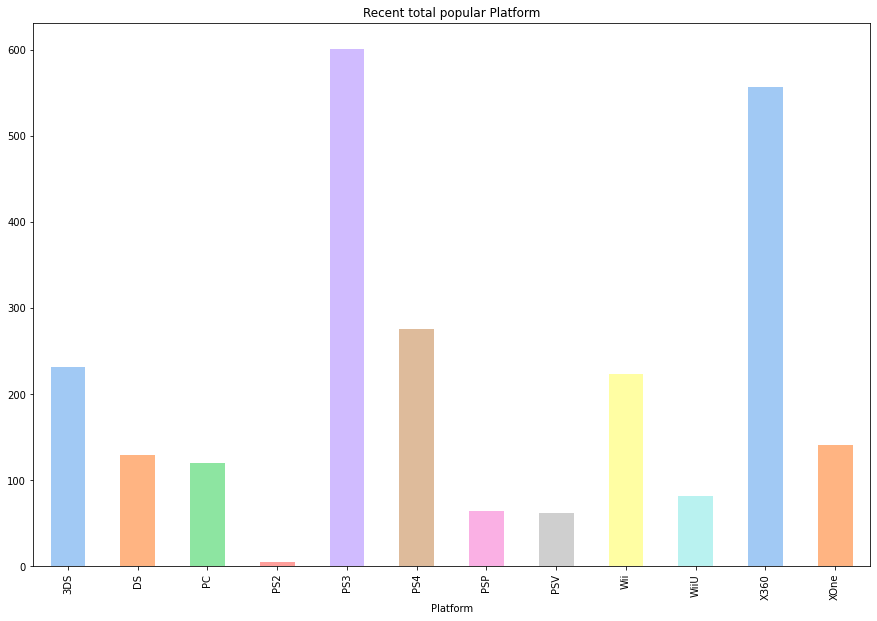

In [252]:
colors = sns.color_palette('pastel')
df_yp_rc_tt2.plot(kind='bar', figsize=(15,10),width = 0.5, color=colors, title = 'Recent total popular Platform')

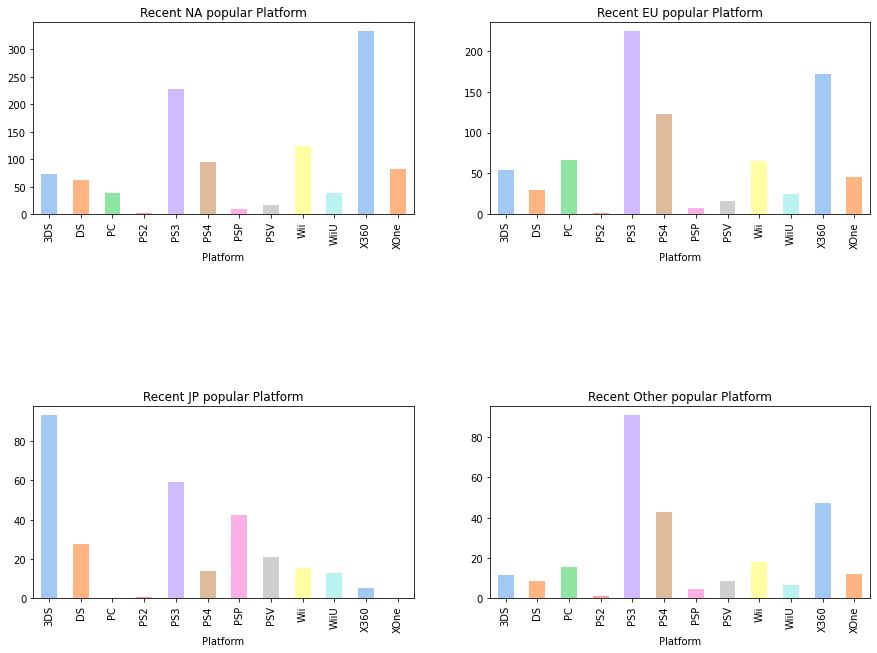

In [253]:
plt.subplot(2,2,1)
colors = sns.color_palette('pastel')
df_yp_rc_na.plot(kind='bar', figsize=(15,10),width = 0.5, color=colors, title = 'Recent NA popular Platform')

plt.subplot(2,2,2)
colors = sns.color_palette('pastel')
df_yp_rc_eu.plot(kind='bar', figsize=(15,10),width = 0.5, color=colors, title = 'Recent EU popular Platform')

plt.subplot(2,2,3)
colors = sns.color_palette('pastel')
df_yp_rc_jp.plot(kind='bar', figsize=(15,10),width = 0.5, color=colors,title = 'Recent JP popular Platform')

plt.subplot(2,2,4)
colors = sns.color_palette('pastel')
df_yp_rc_ot.plot(kind='bar', figsize=(15,10),width = 0.5, color=colors, title= 'Recent Other popular Platform')

plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=1)
